In [2]:
# Import necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision import models
import matplotlib.pyplot as plt

In [3]:
if torch.cuda.is_available():
    device=torch.device('cuda')
else:
    device=torch.device('cpu')
print('Device used : ' , device)

Device used :  cuda


In [4]:
# Define transformation for image preprocessing
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding=4),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

In [5]:
# Load CIFAR-10 dataset
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


In [6]:
# Load pre-trained ResNet model
model = models.resnet18(pretrained=True)

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [12]:
# Modify the final fully connected layer for CIFAR-10 (10 classes)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 10)

print(*list(model.children())[:-1])

# Move model to the GPU
model = model.to(device)

Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False) BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True) ReLU(inplace=True) MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False) Sequential(
  (0): BasicBlock(
    (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (1): BasicBlock(
    (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=Fal

In [7]:
# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [8]:
# Training function
def train_model(model, train_loader, criterion, optimizer, epochs=10):
    model.train()
    train_loss = []
    for epoch in range(epochs):
        running_loss = 0.0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()

            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
        epoch_loss = running_loss / len(train_loader)
        train_loss.append(epoch_loss)
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {epoch_loss:.4f}')
    return train_loss

In [9]:
# Testing function
def test_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print(f'Accuracy: {100 * correct / total:.2f}%')

In [10]:
# Plotting loss function over epochs
def plot_loss(train_loss):
    plt.plot(train_loss, label='Training Loss')
    plt.title('Loss Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

Epoch [1/15], Loss: 1.1158
Epoch [2/15], Loss: 0.8212
Epoch [3/15], Loss: 0.7243
Epoch [4/15], Loss: 0.6677
Epoch [5/15], Loss: 0.6584
Epoch [6/15], Loss: 0.5793
Epoch [7/15], Loss: 0.5558
Epoch [8/15], Loss: 0.5318
Epoch [9/15], Loss: 0.5133
Epoch [10/15], Loss: 0.4899
Epoch [11/15], Loss: 0.4689
Epoch [12/15], Loss: 0.4647
Epoch [13/15], Loss: 0.4665
Epoch [14/15], Loss: 0.4247
Epoch [15/15], Loss: 0.4157
Accuracy: 82.96%


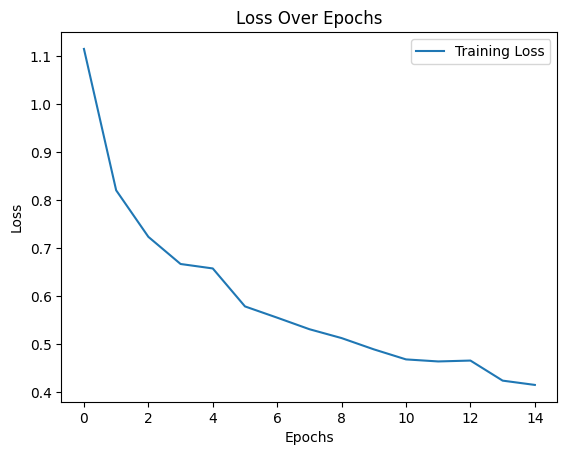

In [12]:
# Training the model
epochs = 15
train_loss = train_model(model, train_loader, criterion, optimizer, epochs)

# Testing the model
test_model(model, test_loader)

# Plotting the training loss
plot_loss(train_loss)

In [13]:
# Load pre-trained VGG16 model
model = models.vgg16_bn(pretrained=True)
print(model.features)
# Modify the classifier (fully connected layers) for CIFAR-10 (10 classes)
model.classifier[6] = nn.Linear(4096, 10)

Downloading: "https://download.pytorch.org/models/vgg16_bn-6c64b313.pth" to C:\Users\Admin/.cache\torch\hub\checkpoints\vgg16_bn-6c64b313.pth
100%|██████████| 528M/528M [08:26<00:00, 1.09MB/s] 


Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (5): ReLU(inplace=True)
  (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (9): ReLU(inplace=True)
  (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (12): ReLU(inplace=True)
  (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (14): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 

In [14]:
# Move model to the GPU
model = model.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9, weight_decay=5e-4)

# Learning rate scheduler (Optional)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [15]:
# Training function
def train_model(model, train_loader, criterion, optimizer, epochs=10):
    model.train()
    train_loss = []
    for epoch in range(epochs):
        running_loss = 0.0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()

            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
        epoch_loss = running_loss / len(train_loader)
        train_loss.append(epoch_loss)
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {epoch_loss:.4f}')

        # Step the scheduler
        scheduler.step()

    return train_loss


In [16]:
# Testing function
def test_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print(f'Accuracy: {100 * correct/total:.2f}%')

Epoch [1/15], Loss: 0.8876
Epoch [2/15], Loss: 0.5578
Epoch [3/15], Loss: 0.4679
Epoch [4/15], Loss: 0.4112
Epoch [5/15], Loss: 0.3658
Epoch [6/15], Loss: 0.3335
Epoch [7/15], Loss: 0.2997
Epoch [8/15], Loss: 0.2456
Epoch [9/15], Loss: 0.2311
Epoch [10/15], Loss: 0.2280
Epoch [11/15], Loss: 0.2243
Epoch [12/15], Loss: 0.2166
Epoch [13/15], Loss: 0.2156
Epoch [14/15], Loss: 0.2109
Epoch [15/15], Loss: 0.2025
Accuracy: 88.61%


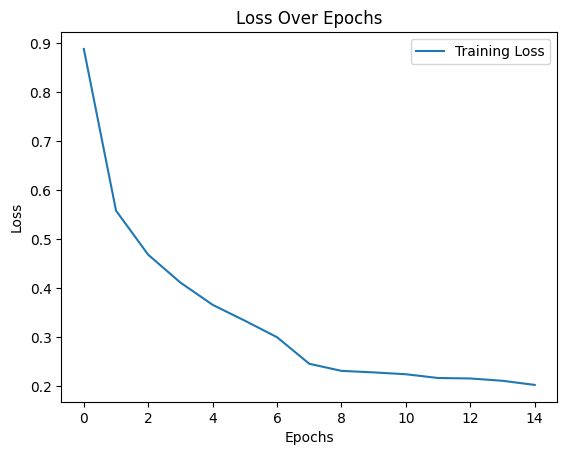

In [17]:
# Plotting loss function over epochs
def plot_loss(train_loss):
    plt.plot(train_loss, label='Training Loss')
    plt.title('Loss Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# Training the model
epochs = 15
train_loss = train_model(model, train_loader, criterion, optimizer, epochs)

# Testing the model
test_model(model, test_loader)

# Plotting the training loss
plot_loss(train_loss)